**Dataset Description**

**Dataset link** : https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

**Source:**
The CDC conducts the Behavioral Risk Factor Surveillance System (BRFSS) annually, a telephone survey that gathers information from over 400,000 Americans on health-related behaviors, chronic conditions, and preventative services. The survey has been conducted since 1984, and the dataset used for this project is from 2015, with responses from 441,455 individuals and 330 features consisting of participant responses and calculated variables. The dataset is available on Kaggle in CSV format.

**Dataset Information:**
The dataset named diabetes_binary_health_indicators_BRFSS2015.csv is a tidy collection of 253,680 survey responses to the CDC's BRFSS2015, where the target variable is Diabetes_binary. It consists of two classes, 0 indicating no diabetes and 1 indicating prediabetes or diabetes. The dataset is imbalanced and contains 21 feature variables.

**Attribute Information:**
1.Diabetes_binary: This column indicates whether the respondent has diabetes or not, with 0 indicating no and 1 indicating yes.
2.HighBP: This column indicates whether the respondent has been told by a health professional that they have high blood pressure, with 0 indicating no and 1 indicating yes.
3.HighChol: This column indicates whether the respondent has ever been told by a health professional that their blood cholesterol is high, with 0 indicating no and 1 indicating yes.
4.CholCheck: This column indicates whether the respondent has had a cholesterol check within the past five years, with 0 indicating no and 1 indicating yes.
5.BMI: This column indicates the Body Mass Index (BMI) of the respondent.
6.Smoker: This column indicates whether the respondent has smoked at least 100 cigarettes in their lifetime, with 0 indicating no and 1 indicating yes.
7.Stroke: This column indicates whether the respondent has ever been told by a health professional that they have had a stroke, with 0 indicating no and 1 indicating yes.
8.HeartDiseaseorAttack: This column indicates whether the respondent has ever reported having coronary heart disease (CHD) or myocardial infarction (MI), with 0 indicating no and 1 indicating yes.
9.PhysActivity: This column indicates whether the respondent has reported doing physical activity or exercise during the past 30 days other than their regular job, with 0 indicating no and 1 indicating yes.
10.Fruits: This column indicates whether the respondent consumes fruit at least once per day, with 0 indicating no and 1 indicating yes.
11.Veggies: This column indicates whether the respondent consumes vegetables at least once per day, with 0 indicating no and 1 indicating yes.
12.HvyAlcoholConsump: This column indicates whether the respondent is a heavy drinker according to their gender, with adult men having more than 14 drinks per week and adult women having more than 7 drinks per week. 0 indicates no and 1 indicates yes.
13.AnyHealthcare: This column indicates if the respondent has any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service, with 0 indicating no and 1 indicating yes.
14.NoDocbcCost: This column indicates whether the respondent was unable to see a doctor due to cost in the past 12 months, with 0 indicating no and 1 indicating yes.
15.GenHlth: This column asks the respondent to rate their general health on a scale of 1 to 5.
16.MentHlth: This column asks the respondent to indicate how many days during the past 30 days their mental health was not good, which includes stress, depression, and problems with emotions. The response is a number between 0 and 30.
17.PhysHlth: This column asks the respondent to indicate how many days during the past 30 days their physical health was not good, which includes physical illness and injury. The response is a number between 0 and 30.
18.DiffWalk: This column indicates whether the respondent has serious difficulty walking or climbing stairs, with 0 indicating no and 1 indicating yes.
19.Sex: This column asks the respondent to indicate their sex, with 0 indicating female and 1 indicating male.
20.Age: This column indicates the age of the respondent, which is divided into fourteen levels numbered 1 to 14.
21.Education: This column asks the respondent to indicate the highest grade or year of school they completed, with 1 indicating less than high school and 6 indicating graduate or professional school.
22.Income: This column asks the respondent to indicate their annual household income from all sources, with 1 indicating less than $10,000 and 8 indicating $75,000 or more.


In [1]:
#Importing required modules and libraries
import pandas as pd
import numpy as np
import math
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading a CSV file containing diabetes health indicators data 
# from the Behavioral Risk Factor Surveillance System (BRFSS) in 2015 and storing it in a Pandas DataFrame called df.
df = pd.read_csv('D:/Spring 23/BIG DATA/diabetics dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
# displaying the first five rows of the DataFrame df
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [4]:
# Generating a pandas profiling report for the DataFrame df
profile = ProfileReport(df)

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Exporting the pandas profiling report generated earlier to an HTML file 
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Displaying the number of rows and columns in df
df.shape

(253680, 22)

In [8]:
# Displaying a concise summary of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
# Providing a statistical summary of the numerical columns in the DataFrame df
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [10]:
#Converting the data type of several columns in the DataFrame df to integer data type using the astype() method.
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [11]:
# Displaying a concise summary of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [12]:
# checking missing values in the DataFrame df using the isnull() method
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no missing values in the dataset

In [13]:
# Identifying and printing the number of duplicate rows in the DataFrame df by calling the duplicated() method
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))
duplicate

Duplicate Rows :  24206


Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
1242                  1       1         1          1   27       1       0   
1563                  0       0         0          1   21       1       0   
2700                  0       0         0          1   32       0       0   
3160                  0       0         0          1   21       0       0   
3332                  0       0         0          1   24       0       0   
...                 ...     ...       ...        ...  ...     ...     ...   
253492                1       1         1          1   33       0       0   
253550                0       0         0          1   25       0       0   
253563                0       0         1          1   24       1       0   
253597                0       0         0          1   24       0       0   
253638                0       0         0          1   24       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                       0             0       0  ...              1   
1563                       0             1       1  ...              1   
2700                       0             1       1  ...              1   
3160                       0             1       1  ...              1   
3332                       0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
253492                     0             1       1  ...              1   
253550                     0             1       1  ...              1   
253563                     0             1       1  ...              1   
253597                     0             1       1  ...              1   
253638                     0             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
1242              0        5         0        30         1    0   10   
1563              0        1         0         0         0    0    4   
2700              0        2         0         0         0    0    5   
3160              0        1         0         0         0    0    4   
3332              0        1         0         0         0    1    9   
...             ...      ...       ...       ...       ...  ...  ...   
253492            0        3         0         0         0    1    9   
253550            0        1         0         0         0    0    7   
253563            0        2         0         0         0    1    8   
253597            0        2         0         0         0    0    5   
253638            0        2         0         0         0    1    1   

        Education  Income  
1242            4       5  
1563            6       8  
2700            6       8  
3160            6       8  
3332            6       8  
...           ...     ...  
253492          6       6  
253550          6       8  
253563          6       8  
253597          6       8  
253638          4       6  

[24206 rows x 22 columns]

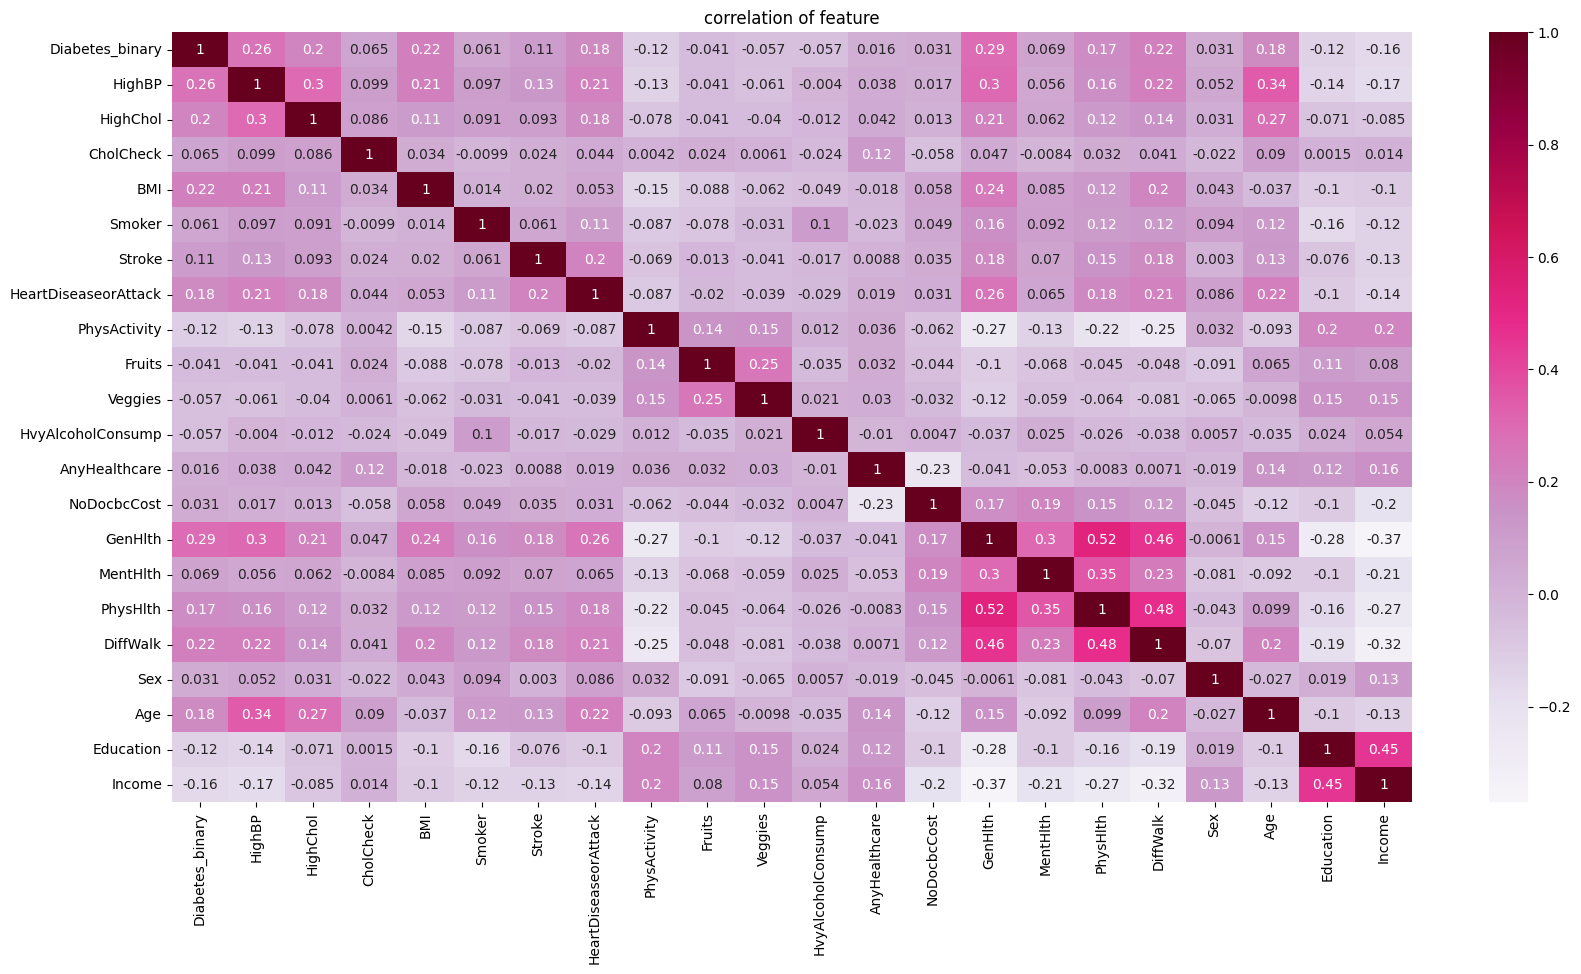

In [14]:
# Generating a heatmap of the correlation between features in the dataframe df
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='PuRd' )
plt.title("correlation of feature")
plt.show()

**Variables that are more correlated with the target variable Diabetes_binary:**

GenHlth,BMI,HeartDiseaseorAttack,Education,HighBP,HighCol,PhysHlth,Income,DiffWalk,Age,Physactivity

**Variables that have a very weak correlation:**

AnyHealthcare,Fruits,Smoker,NoDocbcCost,Sex,Veggies


In [15]:
# Calculating the correlation coefficients between the 'Diabetes_binary' column of the dataframe 'df' and all other columns in 'df'
df.corr()['Diabetes_binary']

Diabetes_binary         1.000000
HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
GenHlth                 0.293569
MentHlth                0.069315
PhysHlth                0.171337
DiffWalk                0.218344
Sex                     0.031430
Age                     0.177442
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

In [16]:
# Dropping the duplicate rows from the DataFrame 'df' and updating it in place
df.drop_duplicates(inplace = True)

In [17]:
# Checking if there are any duplicate rows in the DataFrame and returning the number of duplicate rows
df.duplicated().sum()

0

In [18]:
# Displaying the number of rows and columns in df
df.shape

(229474, 22)

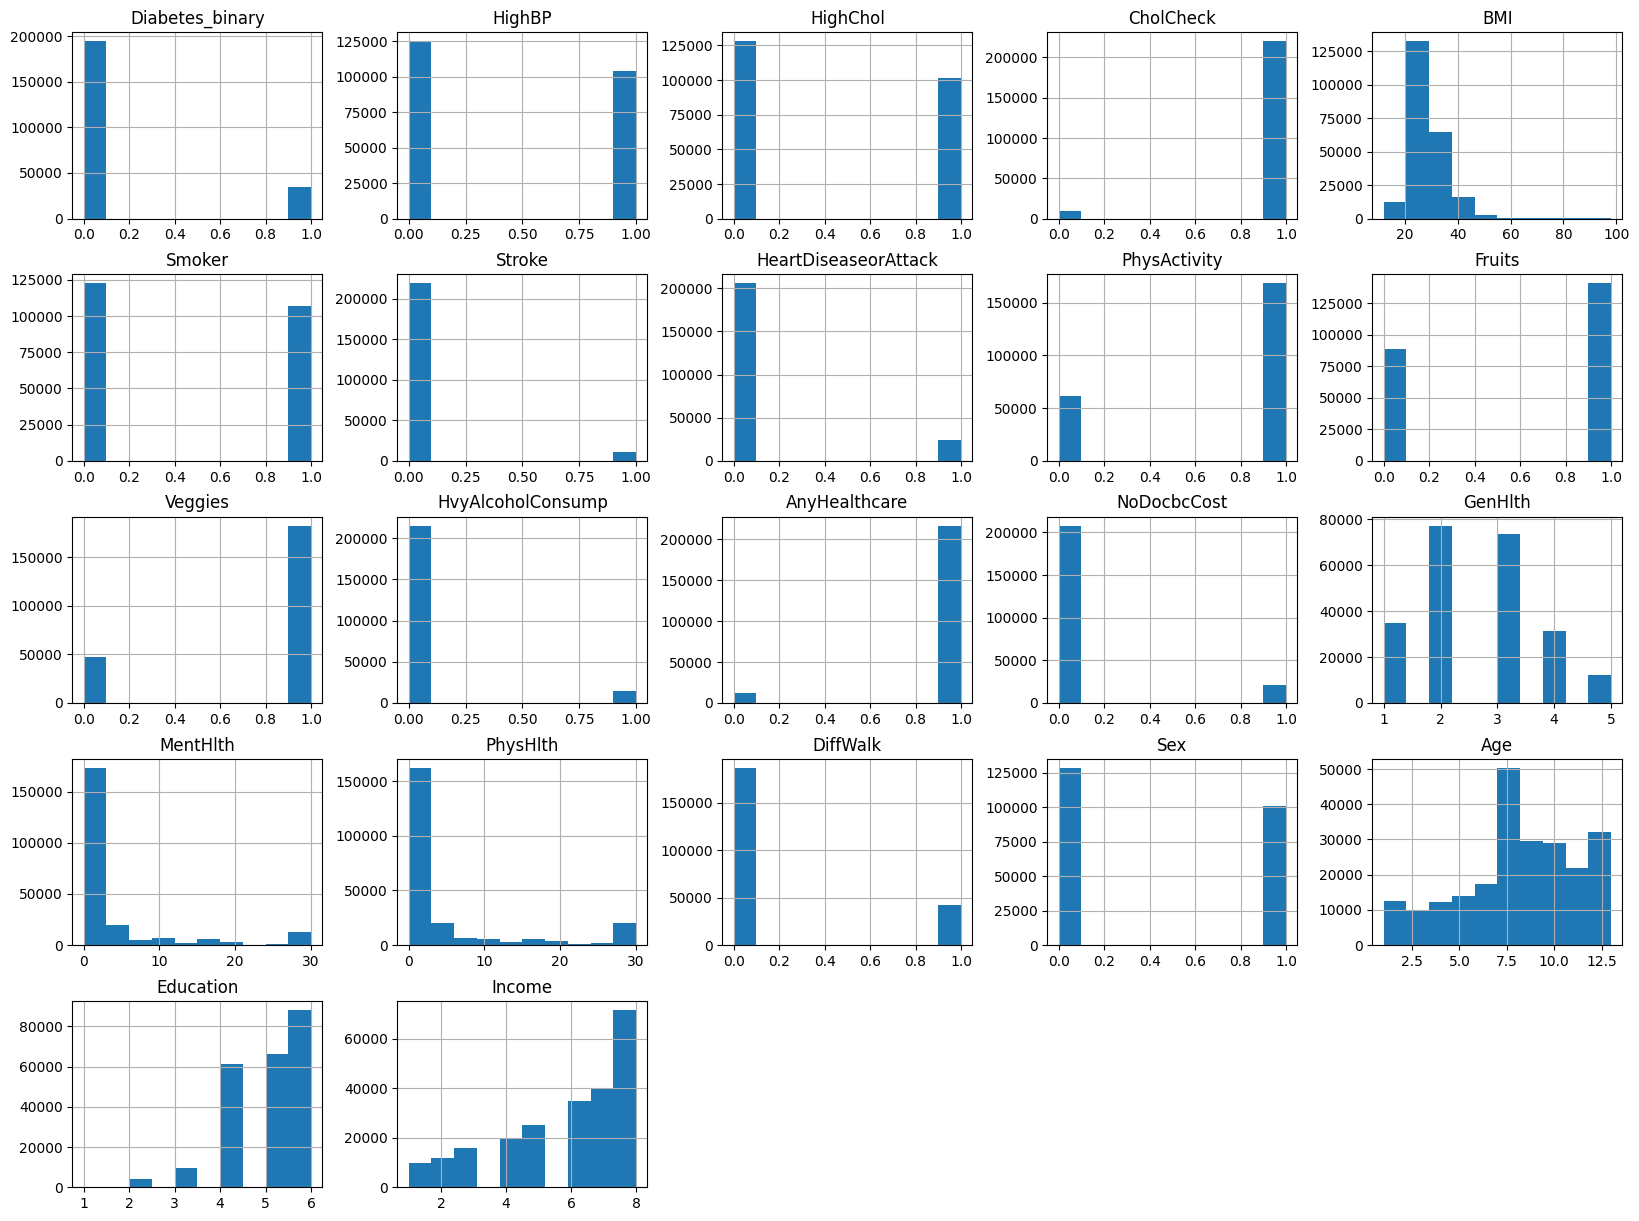

In [19]:
# Creating a histogram for each numerical column in the dataframe df
df.hist(figsize=(20,15));

In [20]:
# Replacing the string values "Non-Diabetic" with 0 and "Diabetic" with 1 in the "Diabetes_binary" column of the DataFrame "df"
df["Diabetes_binary"] = df["Diabetes_binary"].replace({"Non-Diabetic":0, "Diabetic":1})

In [21]:
# Creating a new copy of the DataFrame df and assigning it to a new variable df2
df2 = df.copy() 

In [22]:
# To show the relation between features clearly

df2.Age[df2['Age'] == 1] = '18 to 24'
df2.Age[df2['Age'] == 2] = '25 to 29'
df2.Age[df2['Age'] == 3] = '30 to 34'
df2.Age[df2['Age'] == 4] = '35 to 39'
df2.Age[df2['Age'] == 5] = '40 to 44'
df2.Age[df2['Age'] == 6] = '45 to 49'
df2.Age[df2['Age'] == 7] = '50 to 54'
df2.Age[df2['Age'] == 8] = '55 to 59'
df2.Age[df2['Age'] == 9] = '60 to 64'
df2.Age[df2['Age'] == 10] = '65 to 69'
df2.Age[df2['Age'] == 11] = '70 to 74'
df2.Age[df2['Age'] == 12] = '75 to 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'No Diabetes'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetes'

df2.HighBP[df2['HighBP'] == 0] = 'No High'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'No High Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

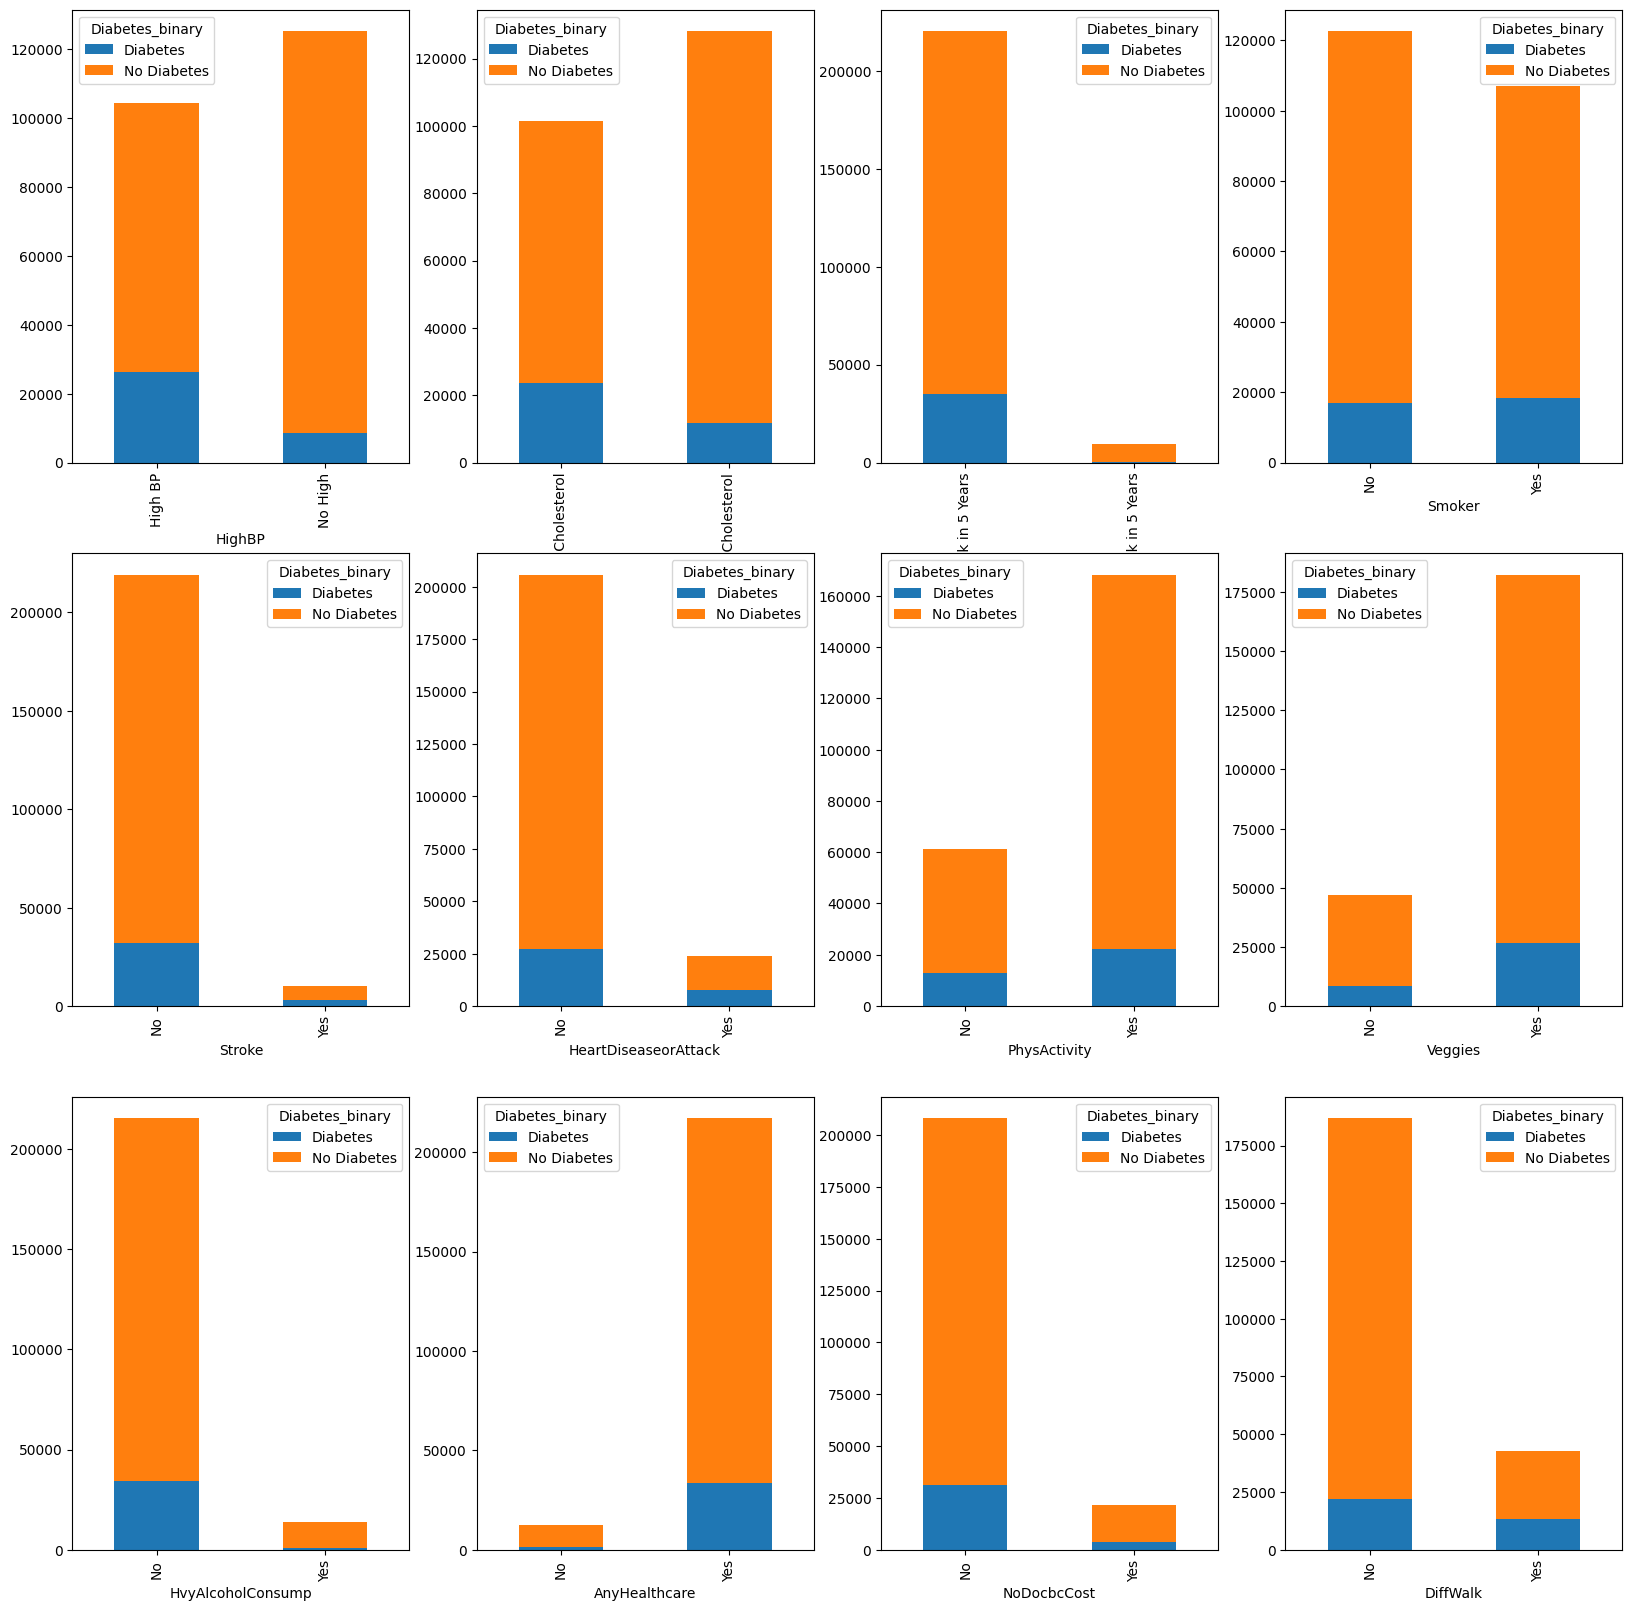

In [23]:
# Creating a stacked bar plot for each column in 'cols' showing the relationship between Diabetes and No Diabetes
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
def create_plot_pivot(df2, x_column):
    _df_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

In [24]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

df2["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

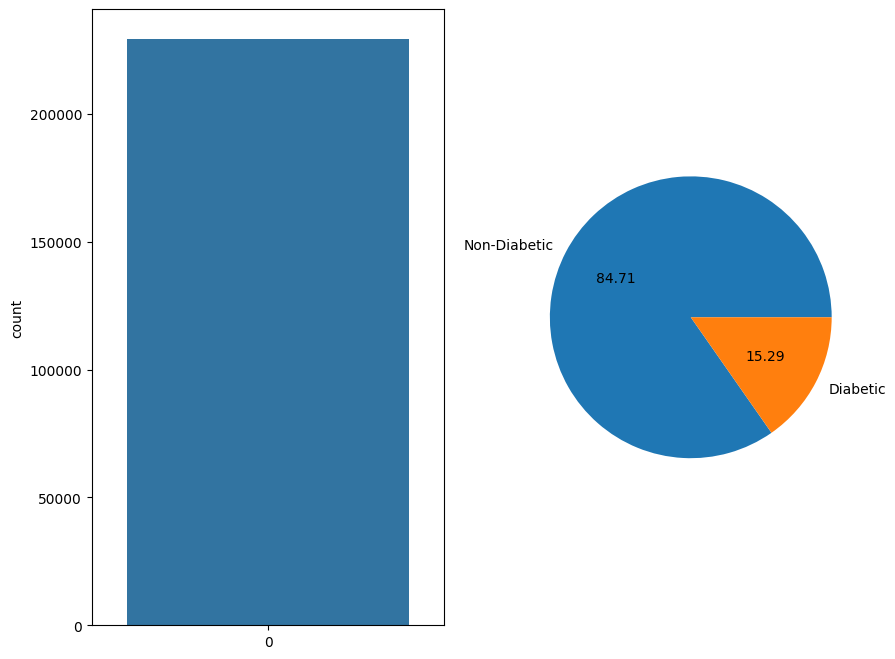

In [25]:
# Checking diabetic and non diabetic pepoles average by countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(df['Diabetes_binary'],ax=plot1[0])

# Checking diabetic and non diabetic pepoles average by pie chart

labels=["Non-Diabetic","Diabetic"]

plt.pie(df["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

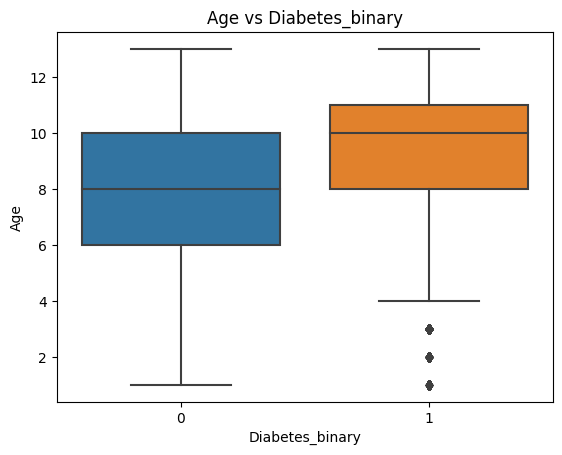

In [26]:
# Creating a boxplot showing distribution of age between Diabetes and Non-Diabetes patients
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = df)
plt.title('Age vs Diabetes_binary')
plt.show()

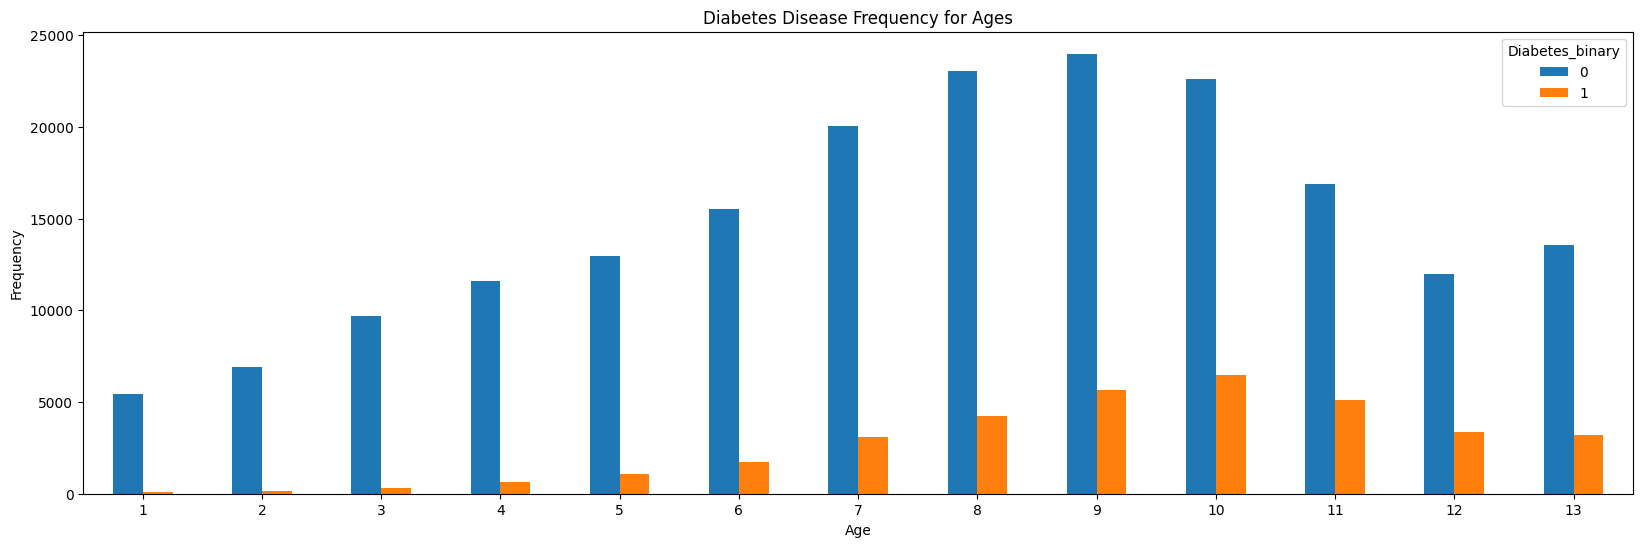

In [27]:
# Creating a bar plot of Diabetes Disease Frequency for Ages using a cross-tabulation between Age and Diabetes_binary columns in df
pd.crosstab(df.Age,df.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

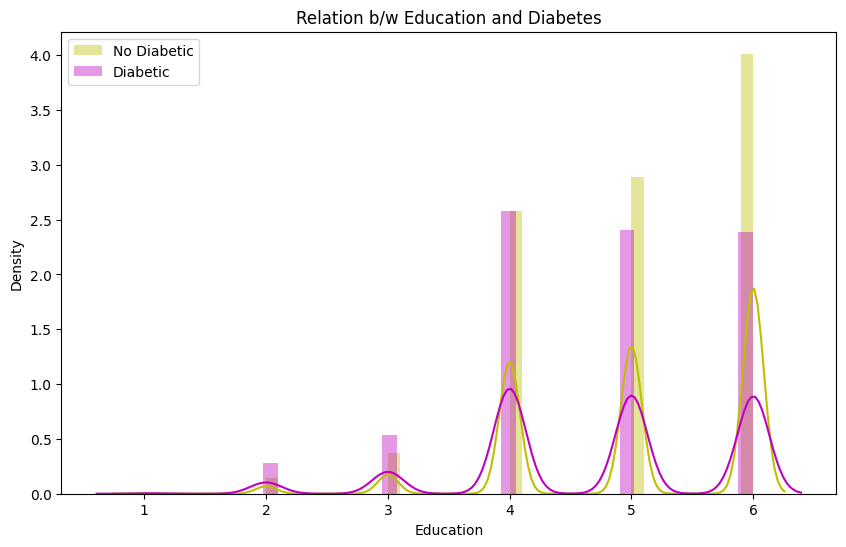

In [28]:
# Plot distribution of education for diabetes vs non-diabetes
plt.figure(figsize=(10,6))


sns.distplot(df.Education[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

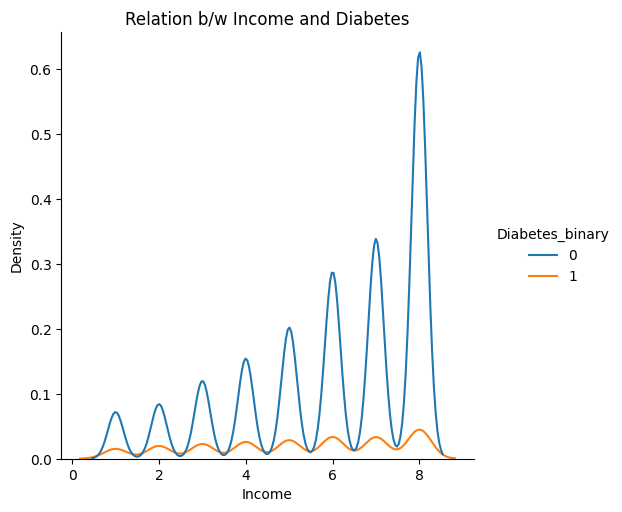

In [29]:
# Visualizing the relation between Income and Diabetes using a displot
plt.figure(figsize=(20,10))

sns.displot(data=df, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes")

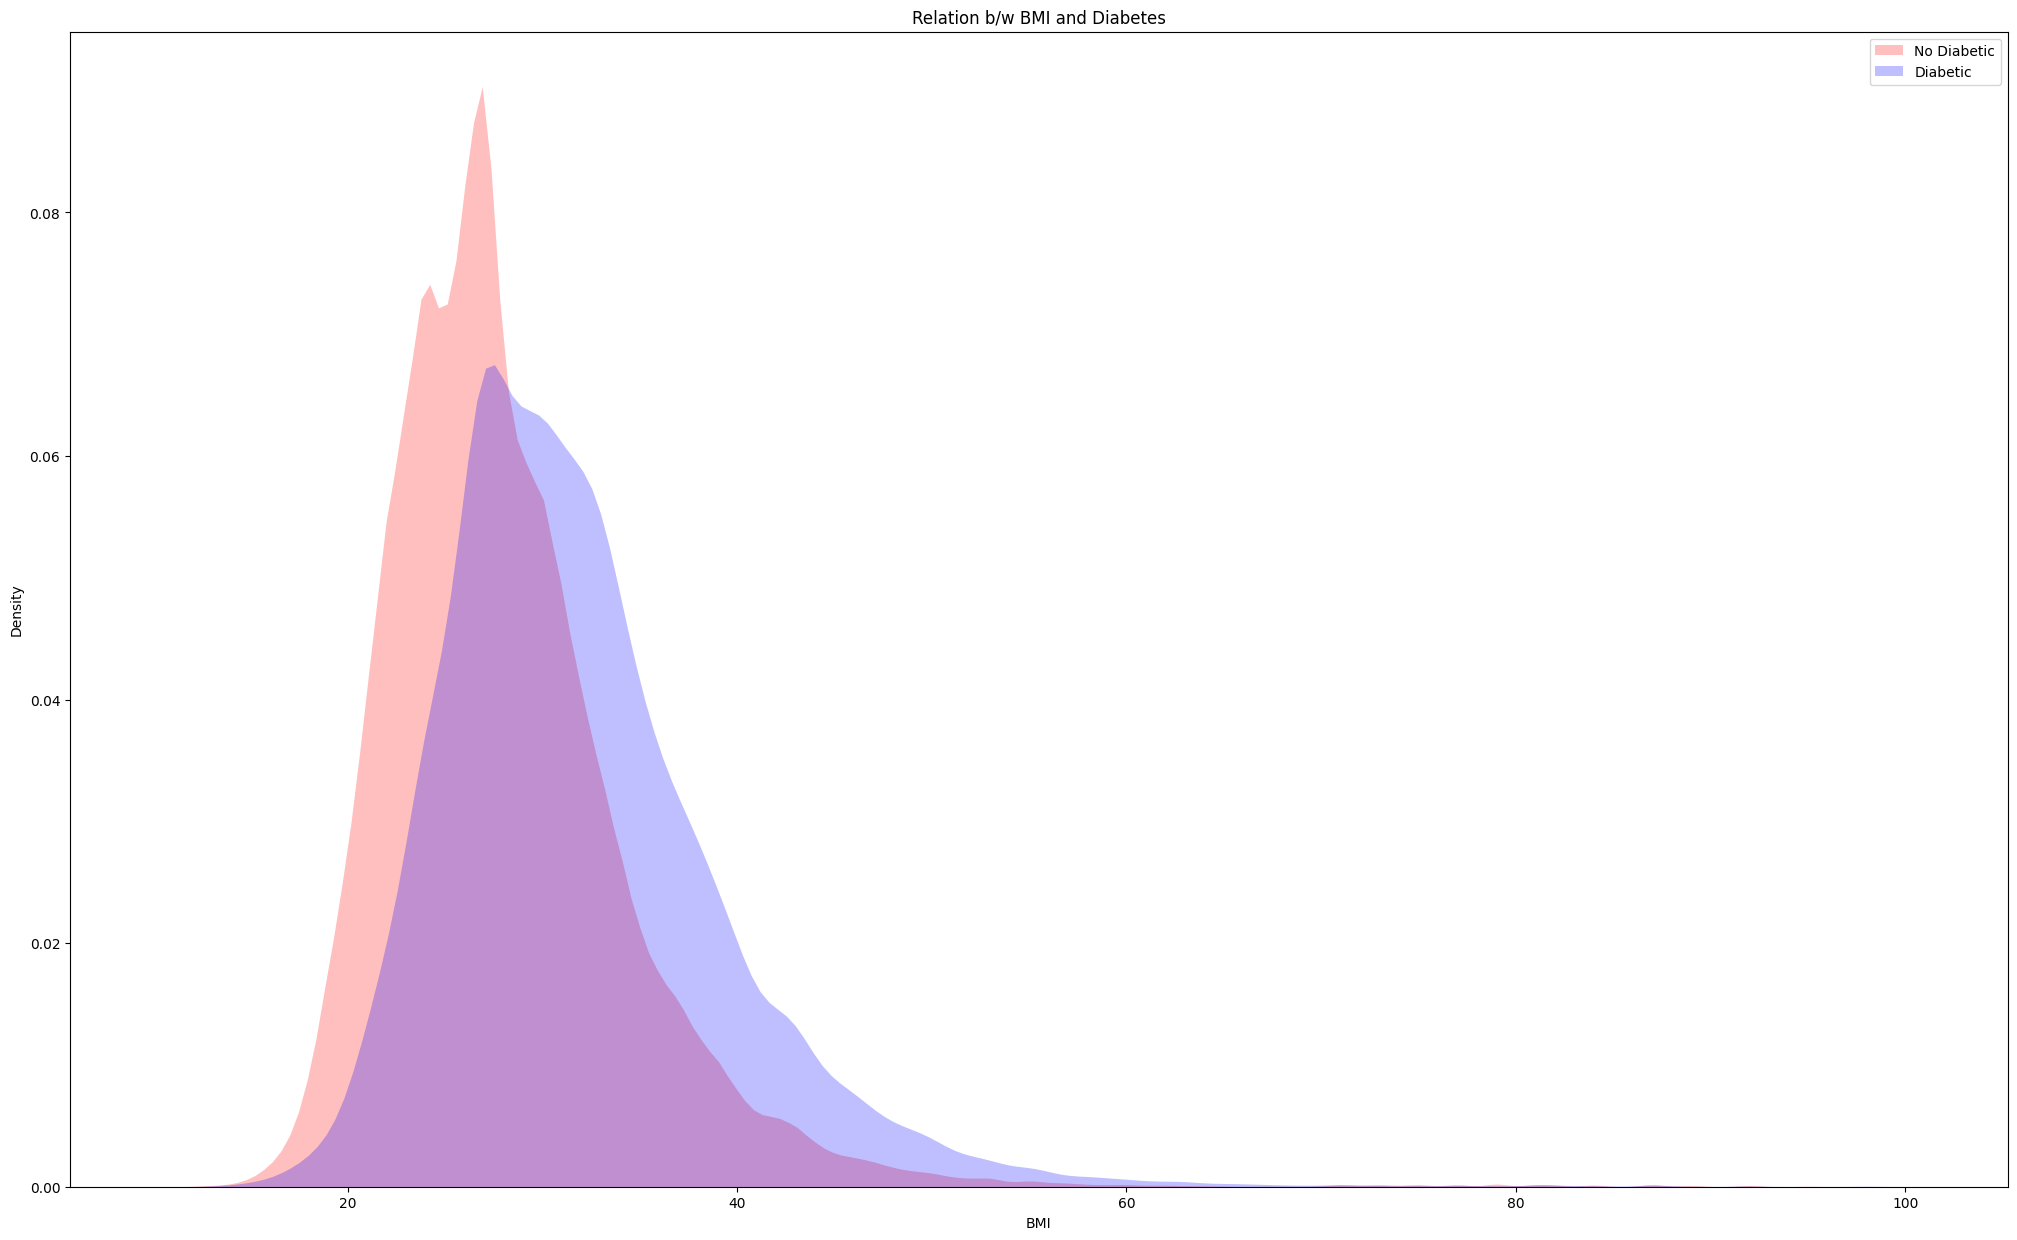

In [30]:
# Visualizing the relation between BMI and Diabetes using a KDE plot
plt.figure(figsize=(25, 15))
sns.kdeplot(df.BMI[df.Diabetes_binary == 0], color="r",fill=True, common_norm=False,linewidth=0, label="No Diabetic")
sns.kdeplot(df.BMI[df.Diabetes_binary == 1], color="b", fill=True, common_norm=False, linewidth=0,label="Diabetic")
plt.title("Relation b/w BMI and Diabetes")
plt.legend()

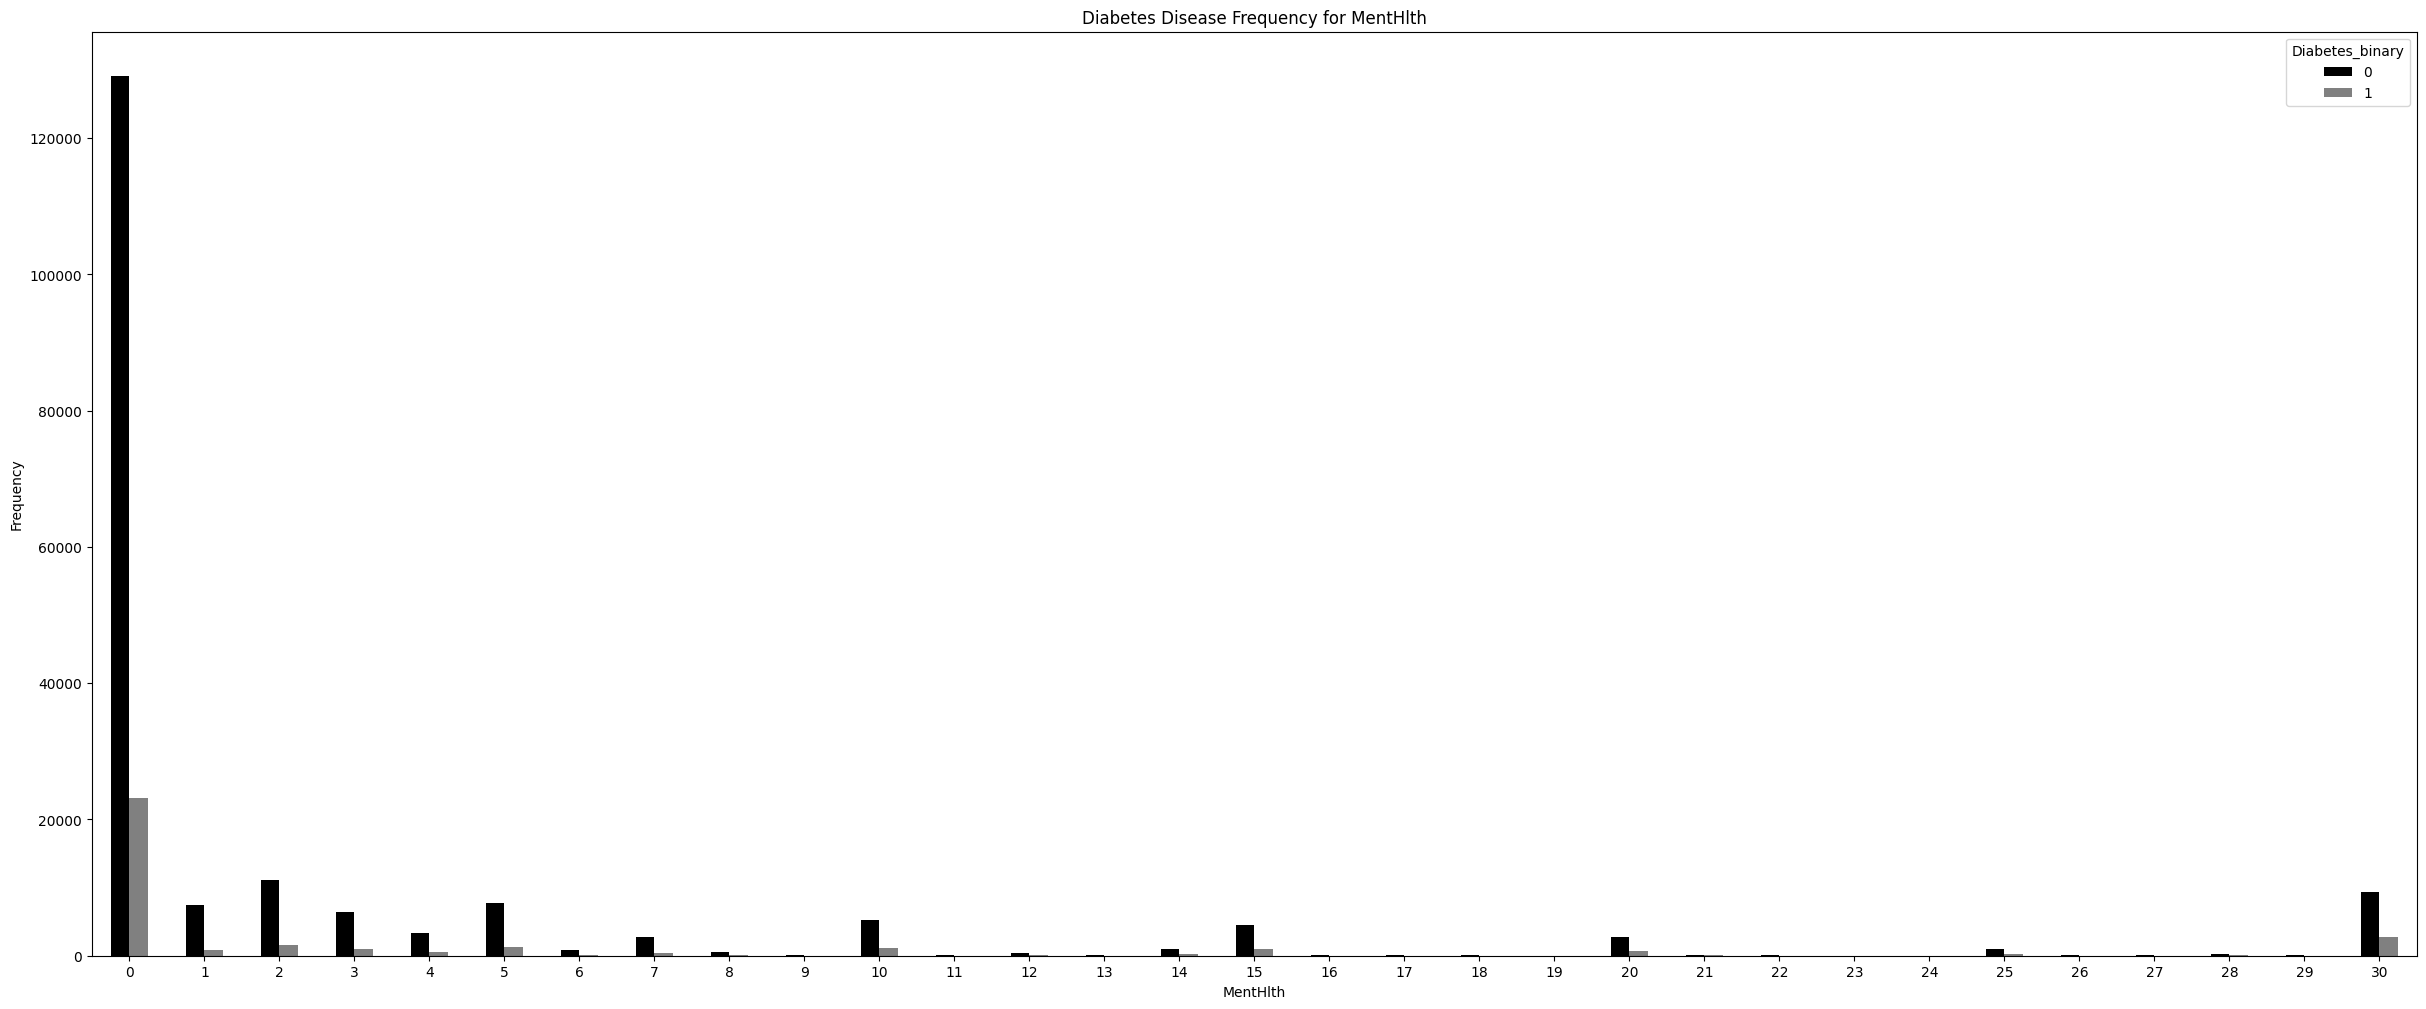

In [31]:
# Plotting frequency of Diabetes Disease for MentHlth using a bar plot
pd.crosstab(df.MentHlth,df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Black', 'Grey' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

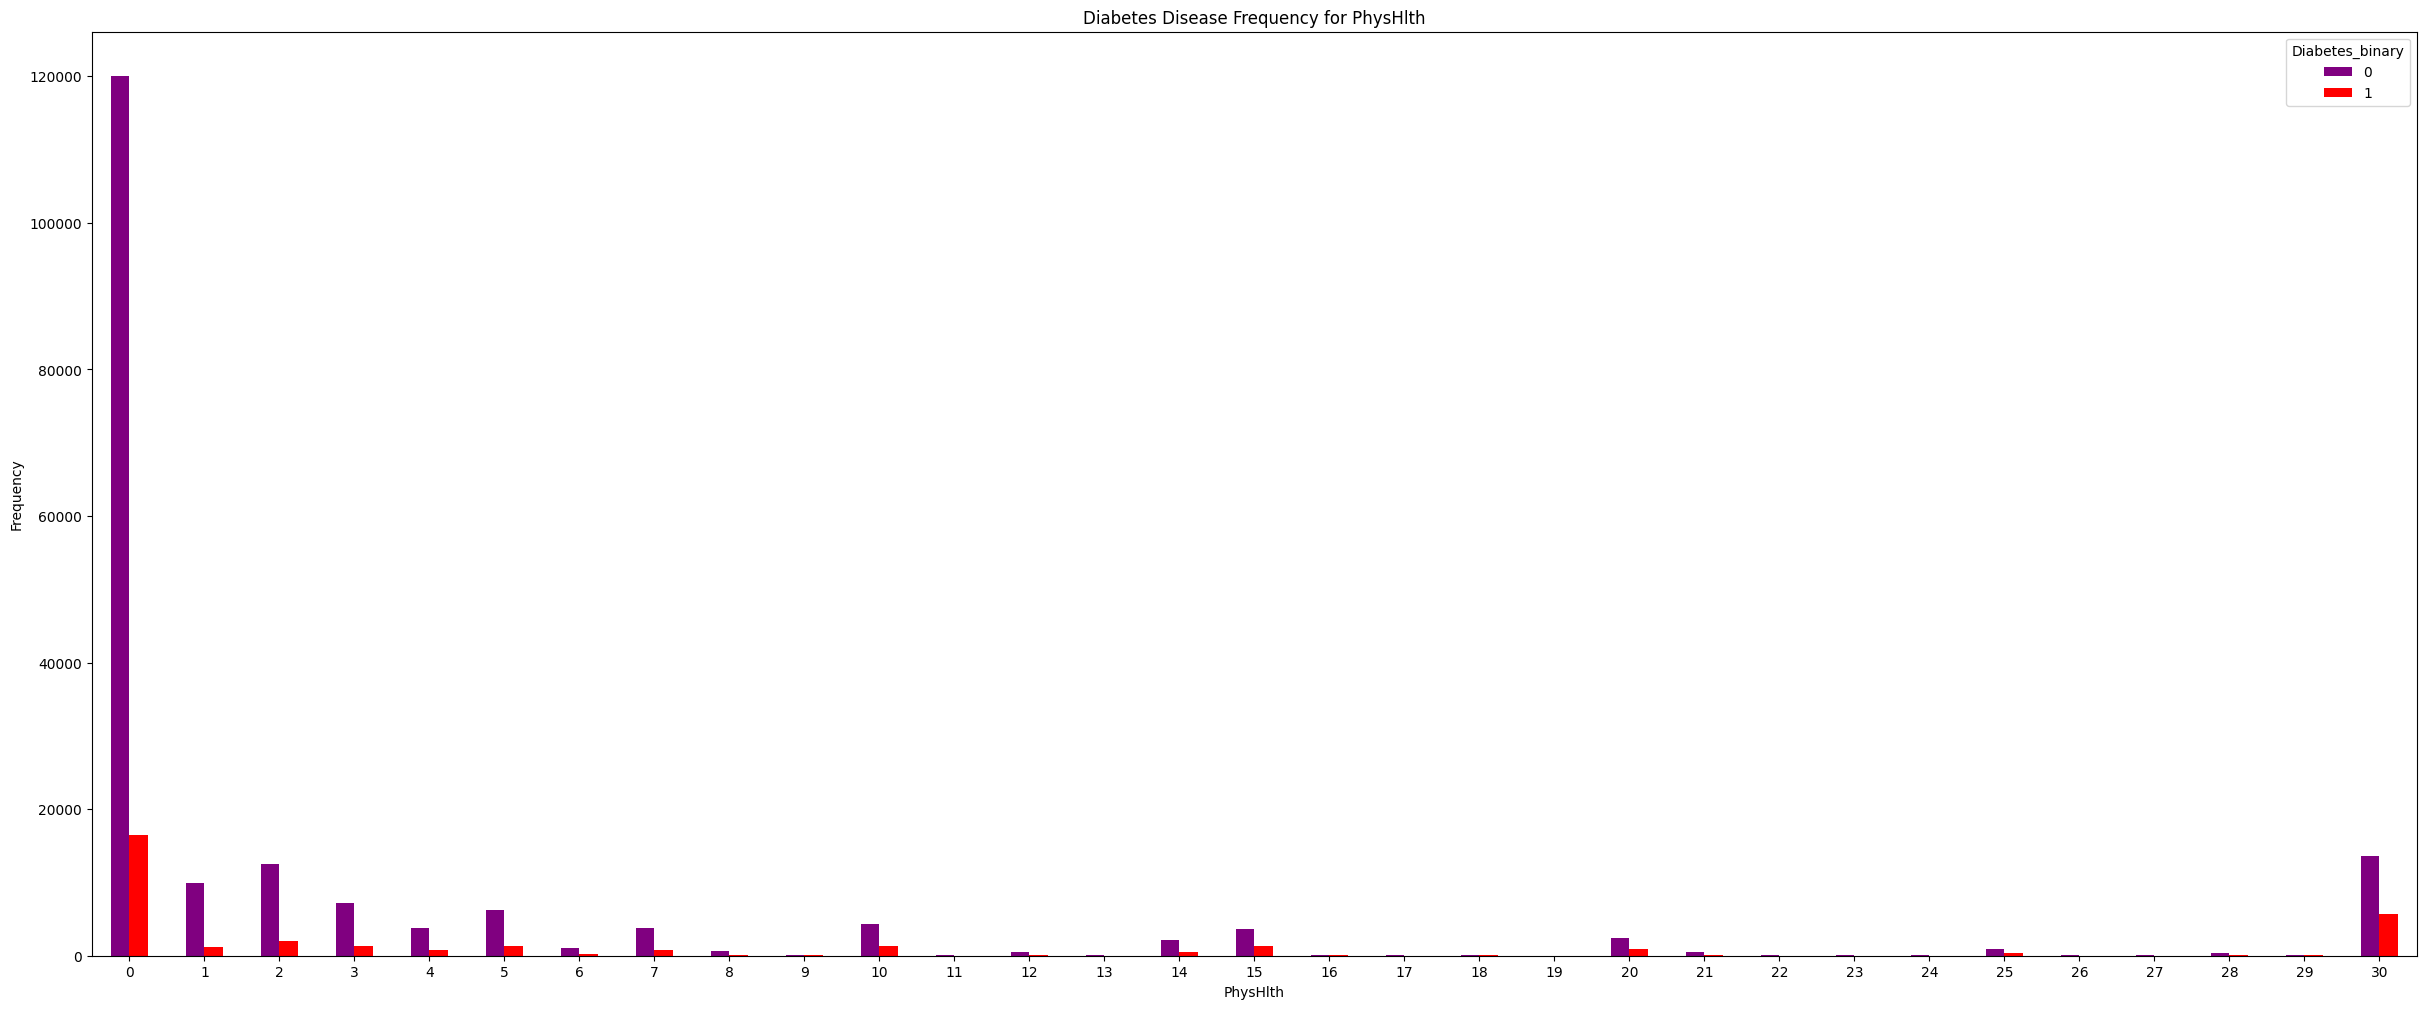

In [32]:
# Plotting frequency of Diabetes Disease for PhysHlth using a bar plot
pd.crosstab(df.PhysHlth,df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

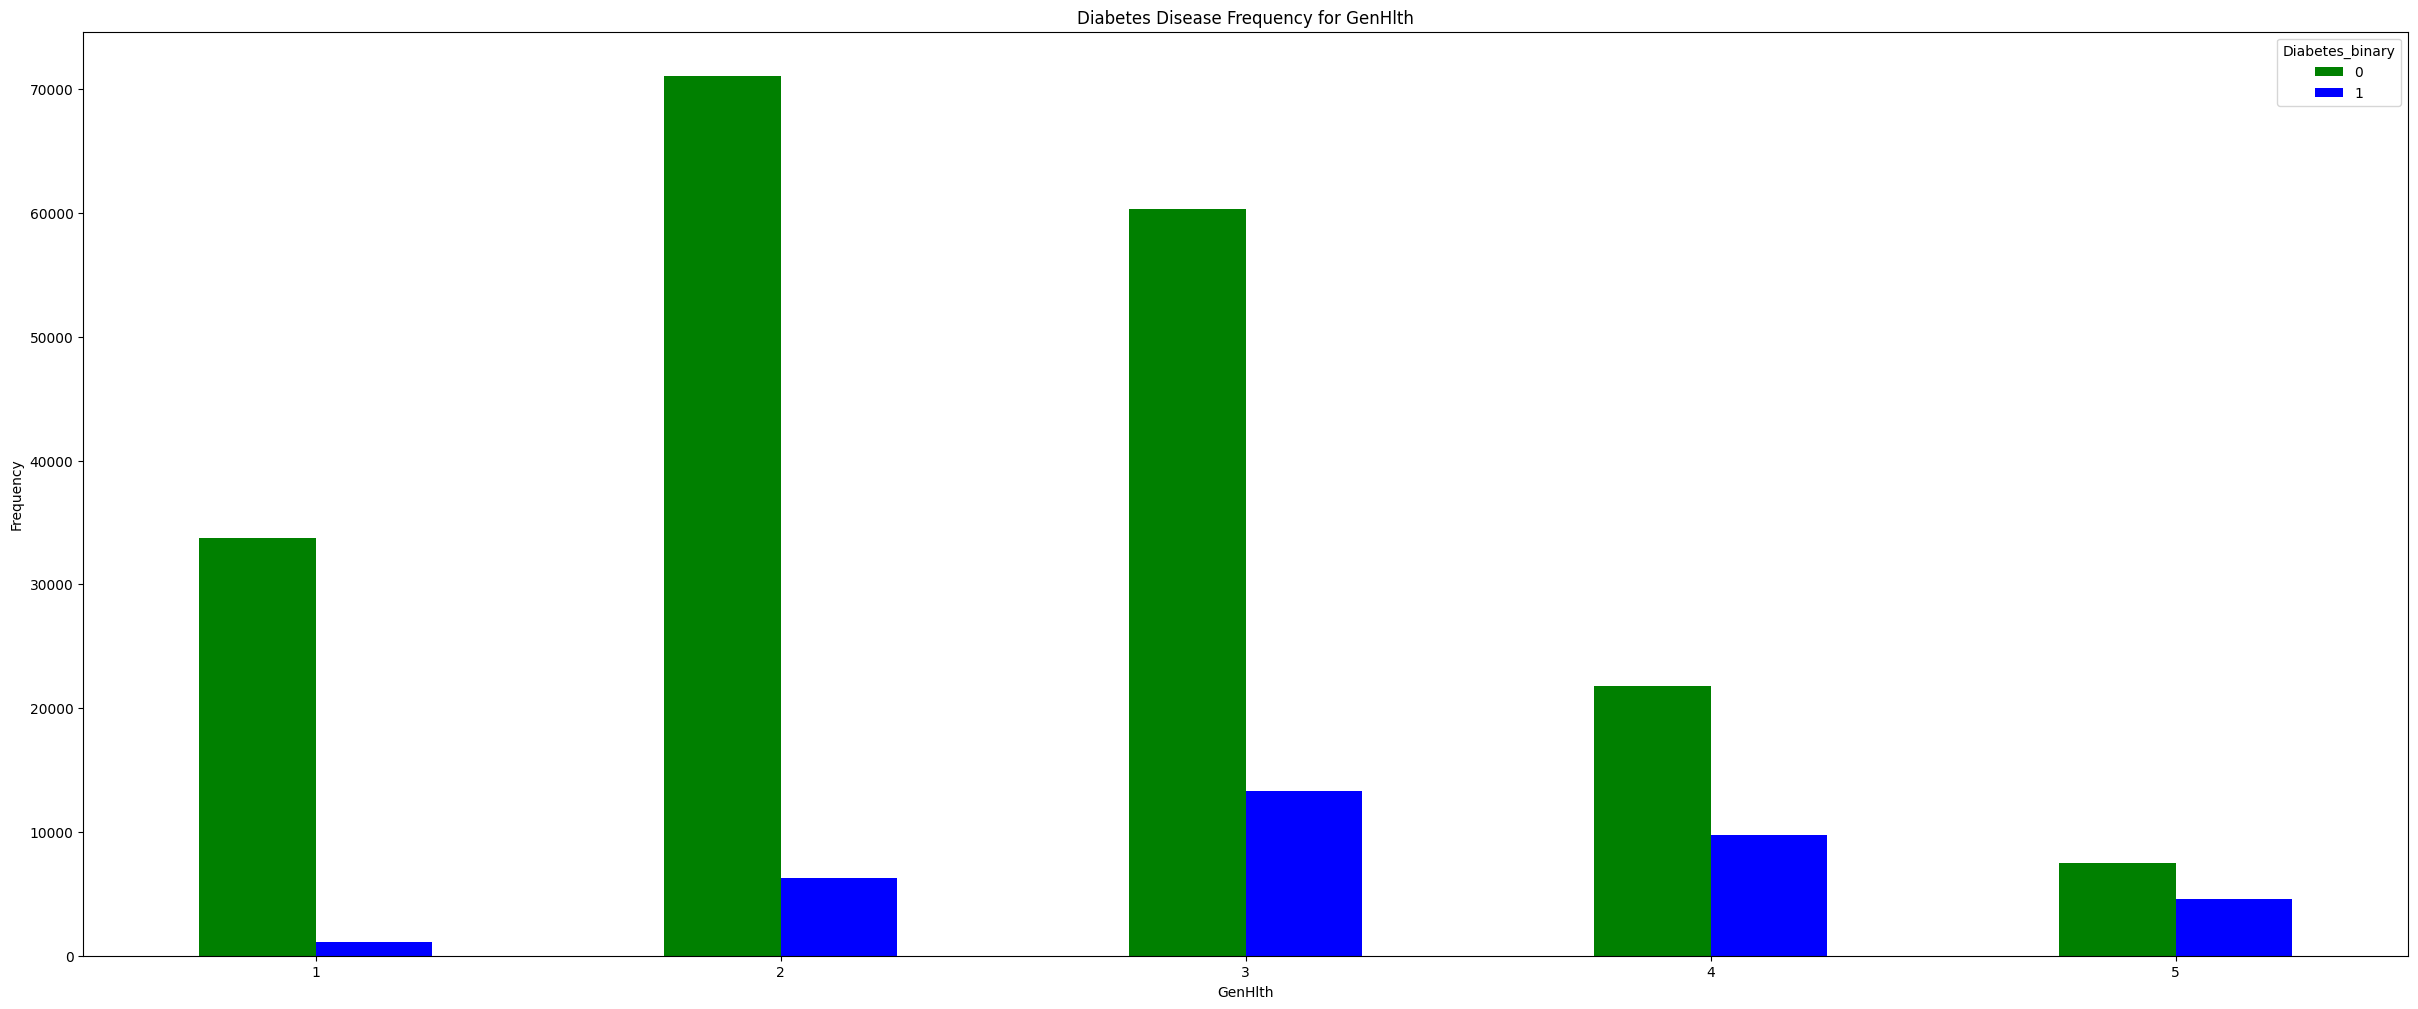

In [33]:
# Plotting frequency of Diabetes Disease for GenHlth using a bar plot
pd.crosstab(df.GenHlth,df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Green', 'Blue' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

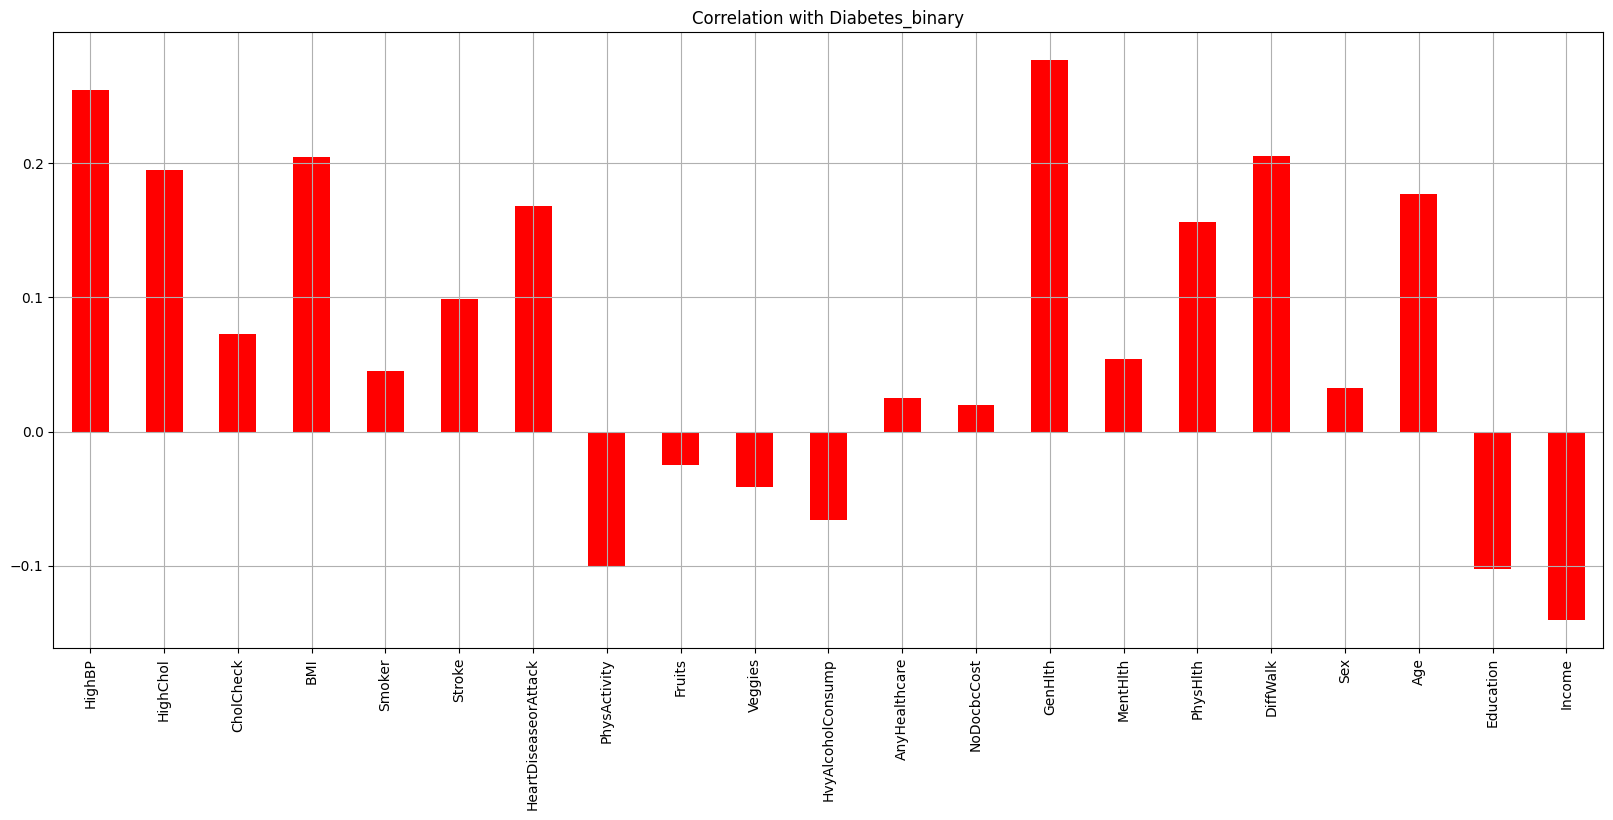

In [34]:
# Plotting a bar chart of correlation coefficients between each column of the DataFrame df and the Diabetes_binary column
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Red");

In [35]:
# Counting the number of values in the 'Diabetes_binary' column
df['Diabetes_binary'].value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

<AxesSubplot:title={'center':'Label Distribution'}>

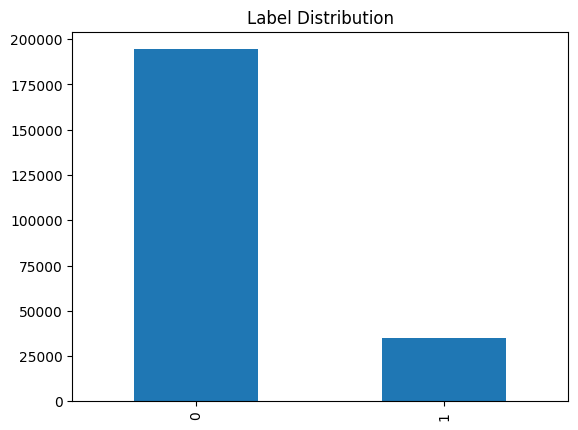

In [36]:
# plotting the label distribution
df['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

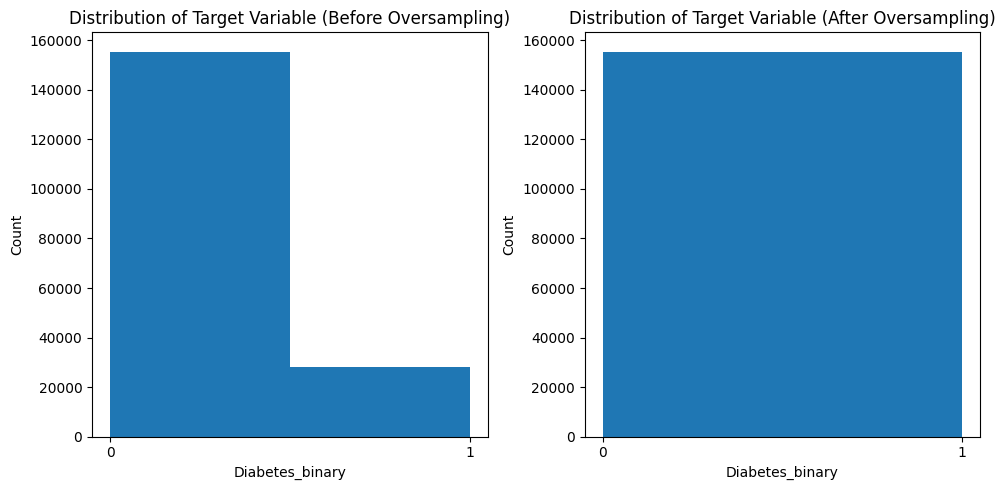

In [37]:
# Splitting dataset to train and test
X = df.drop('Diabetes_binary', axis=1) # features
y = df['Diabetes_binary'] # labels

# Splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# performing random oversampling on the training set only
oversampler = RandomOverSampler(random_state=10)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# plot the distribution of target variable before and after oversampling
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(y_train, bins=2)
ax[0].set_title('Distribution of Target Variable (Before Oversampling)')
ax[0].set_xticks([0, 1])
ax[0].set_xlabel('Diabetes_binary')
ax[0].set_ylabel('Count')

ax[1].hist(y_train_resampled, bins=2)
ax[1].set_title('Distribution of Target Variable (After Oversampling)')
ax[1].set_xticks([0, 1])
ax[1].set_xlabel('Diabetes_binary')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The dataset is split into features (X) and labels (y), where the label is 'Diabetes_binary' column 
and the features are all other columns in the dataset.
The data is then split into a training set and a test set, using a train-test split ratio of 80:20 and a random seed of 10 for reproducibility. This is done using the train_test_split function from scikit-learn.
Random oversampling is applied to the training set only using the RandomOverSampler class from imbalanced-learn library, which generates synthetic samples from the minority class in order to balance the class distribution.
Finally, the distribution of the target variable before and after oversampling is plotted using a histogram. 
This is done using the hist function from Matplotlib.

In [38]:
# Apply SelectKBest class to extract best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Feature scores
f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

f_Scores

Feature         Score
0                 HighBP   8098.548237
1               HighChol   4869.312739
2              CholCheck     48.904140
3                    BMI  15507.736174
4                 Smoker    253.826098
5                 Stroke   2156.678382
6   HeartDiseaseorAttack   5822.145697
7           PhysActivity    617.563886
8                 Fruits     54.688897
9                Veggies     82.098846
10     HvyAlcoholConsump    937.401148
11         AnyHealthcare      7.949731
12           NoDocbcCost     83.662830
13               GenHlth   7671.732832
14              MentHlth  11419.584750
15              PhysHlth  97988.761672
16              DiffWalk   7875.496177
17                   Sex    137.837135
18                   Age   8539.906340
19             Education    479.112939
20                Income   3377.099257

In [39]:
# These are the features that we will be using in our model
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


In [40]:
# Unused columns
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" ]

In [41]:
# Dropping unused columns
df.drop(colomns , axis= 1 ,inplace=True)

**Model Building**

**Logistic Regression Model**

Logistic regression is a suitable model for binary classification problems, where the target variable takes only two possible values. 
In the given dataset, the target variable is binary, i.e., it takes values 0 and 1, indicating whether a person has diabetes or not. 
Therefore, logistic regression can be used to predict whether a person has diabetes or not based on the given features.
The logistic regression model is trying to answer the question of whether a person has diabetes or not, 
Given the values of the input features. It does so by estimating the probability of a positive outcome, i.e., the probability of having diabetes, given the input features. 
The model then classifies a person as having diabetes if the probability of a positive outcome exceeds a certain threshold.

In [42]:
# Initializing the model
model_LR = LogisticRegression()

# fitting the model on the train data
model_LR.fit(X_train_resampled, y_train_resampled)

# predicting values on test data
predictions = model_LR.predict(X_test)

This code is initializing a logistic regression model by creating an instance of the LogisticRegression() class. Then, the model is being fitted to the training data using the fit() method, where X_train_resampled contains the feature variables and y_train_resampled contains the target variable. Finally, the model is being used to make predictions on the test data using the predict() method, where X_test contains the feature variables. The predicted values are stored in the predictions variable.

In [43]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
194499            0                 0
107401            0                 0
16210             0                 0
127385            1                 1
162339            0                 1
...             ...               ...
180134            0                 0
130054            0                 1
233177            0                 0
209982            1                 1
164868            0                 1

[45895 rows x 2 columns]

In [44]:
# Evaluation
accuracies = {}
# calculating the accuracy of the model
accuracy_1 = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy_1
# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression : 71.04

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     38895
           1       0.31      0.75      0.44      7000

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.62     45895
weighted avg       0.84      0.71      0.75     45895


**************************************************

Mean squared error : 0.2896393942695283

**************************************************

Root mean squared error : 0.5381815625507141


Confusion Matrix for Logistic Regression


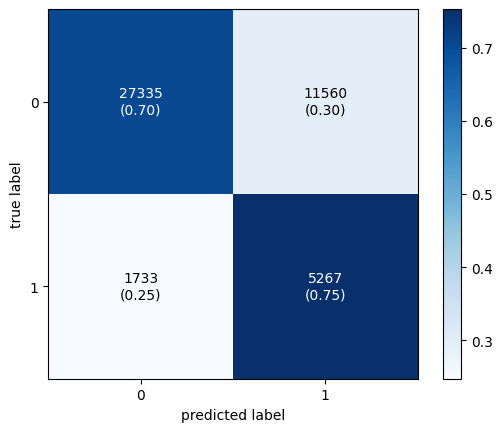

In [45]:
print('Confusion Matrix for Logistic Regression')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [46]:
# K-fold Cross Validation

# define the number of folds
num_folds = 10

# define the evaluation metric
scoring = 'accuracy'

# define the k-fold cross validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=10)

# define the model
model = LogisticRegression()

# evaluate the model using cross-validation
results = cross_val_score(model_LR, X_train_resampled, y_train_resampled, cv=kfold, scoring=scoring)

# print the results
print('Results of k-fold cross-validation:')
print('Mean Accuracy: {:.2f}%'.format(results.mean() * 100.0))
print('Standard Deviation: {:.2f}'.format(results.std()))

Results of k-fold cross-validation:
Mean Accuracy: 72.56%
Standard Deviation: 0.00


This code block is performing k-fold cross-validation for a logistic regression model.

num_folds is the number of folds to be used in cross-validation.
scoring is the evaluation metric used to score the performance of the model.
kfold is the k-fold cross-validation object, which splits the data into num_folds folds with shuffling and a random seed of 10.
model is the logistic regression model to be evaluated.
cross_val_score() function is used to evaluate the performance of the logistic regression model using k-fold cross-validation. The function takes the following arguments:
model_LR: the logistic regression model.
X_train_resampled and y_train_resampled: the training data and labels after oversampling using random oversampling.
cv: the k-fold cross-validation object.
scoring: the evaluation metric used to score the performance of the model.

**Random Forest Model**

The Random Forest model is well-suited for classification problems with a high number of features and non-linear relationships between them and the target variable. 
It is also robust to missing values and outliers in the data. 
Given the dataset's complexity with 25 features, Random Forest can handle it efficiently and provide accurate predictions. 
Hence, it is a suitable choice for modeling the given dataset.
The main objective of the Random Forest model in this dataset is to predict whether a person has diabetes or not, based on the values of the input features. 
To achieve this, the model constructs multiple decision trees on various subsets of the input features and target variable. 
Then, it combines the predictions of these trees to make the final prediction. 


In [47]:
# Initializing the model
model_RF = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# fitting the model on the train data
model_RF.fit(X_train_resampled, y_train_resampled)

# predicting values on test data
predictions = model_RF.predict(X_test)

This code is initializing a random forest classifier model with the RandomForestClassifier() function from scikit-learn library. The model is configured with hyperparameters such as n_estimators, criterion, min_samples_split, and random_state. Then, the fit() method is used to train the model on the resampled training data (X_train_resampled and y_train_resampled). Finally, the trained model is used to make predictions on the test set with the predict() method, and the predicted values are stored in the predictions variable.

In [48]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
194499            0                 0
107401            0                 0
16210             0                 0
127385            1                 1
162339            0                 0
...             ...               ...
180134            0                 1
130054            0                 0
233177            0                 0
209982            1                 0
164868            0                 0

[45895 rows x 2 columns]

In [49]:
#  Evaluation

# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, predictions)
accuracies['Random Forest Classifier'] = accuracy_2

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 81.33

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     38895
           1       0.40      0.45      0.42      7000

    accuracy                           0.81     45895
   macro avg       0.65      0.66      0.66     45895
weighted avg       0.82      0.81      0.82     45895


**************************************************

Mean squared error : 0.18670879180738642

**************************************************

Root mean squared error : 0.4320981275212685


Confusion Matrix for Random Forest Classifier


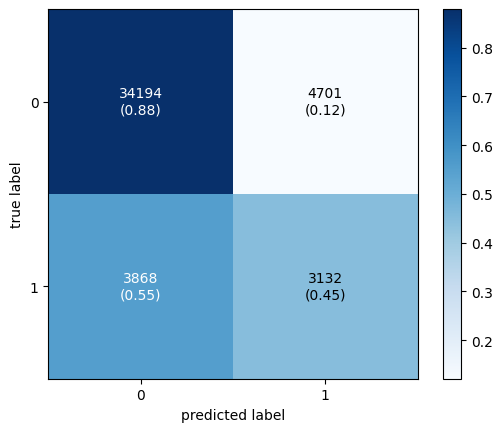

In [50]:
print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [51]:
# K- fold Cross Validation

# Define the number of folds
num_folds = 10

# Define the evaluation metric
scoring = 'accuracy'

# Define the k-fold cross validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=10)

# Define the model
model = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# Evaluate the model using cross-validation
results = cross_val_score(model_RF, X_train_resampled, y_train_resampled, cv=kfold, scoring=scoring)

# Print the results
print('Results of k-fold cross-validation:')
print('Mean Accuracy: {:.2f}%'.format(results.mean() * 100.0))
print('Standard Deviation: {:.2f}'.format(results.std()))

Results of k-fold cross-validation:
Mean Accuracy: 91.69%
Standard Deviation: 0.00


The number of folds for k-fold cross-validation is defined as num_folds = 10.
The evaluation metric for the cross-validation is defined as accuracy, using the string 'accuracy' and assigned to the variable scoring.
The KFold class is used to create a k-fold cross-validation object with n_splits set to num_folds, shuffle set to True, and random_state set to 10. This object will be used to split the training data into num_folds number of folds.
A Random Forest Classifier model is defined using the RandomForestClassifier class with hyperparameters set for n_estimators as 300, criterion as entropy, min_samples_split as 10, and random_state as 0.
The cross_val_score() function from scikit-learn is used to perform k-fold cross-validation. The function takes in the model, training data, cross-validation object, and evaluation metric as arguments. The cross_val_score() function returns an array of scores obtained for each fold.
The mean and standard deviation of the accuracy scores obtained from k-fold cross-validation are calculated using the mean() and std() functions on the results array.

**Decision Tree Model**

The decision tree model is a good choice for the diabetes health indicators dataset because 
It can help identify the most important predictors of diabetes, 
and can also help identify subgroups of patients who may be at increased risk for developing diabetes based on their health indicators.
Some of the questions that the decision tree model can help answer include:
What are the most important factors that contribute to diabetes risk?
How do different health indicators interact to affect diabetes risk?
Are there specific subgroups of patients who may be at increased risk for diabetes based on their health indicators?
What is the overall accuracy of the model in predicting diabetes risk based on health indicators?

In [52]:
# Initializing the model
model_dt = DecisionTreeClassifier()

# fitting the model on the train data
model_dt.fit(X_train_resampled, y_train_resampled)

# predicting values on test data
predictions = model_dt.predict(X_test)

The DecisionTreeClassifier() function is used to initialize the decision tree classifier model with default hyperparameters.
The fit() method of the DecisionTreeClassifier model object is called with X_train_resampled and y_train_resampled as the arguments. This method trains the decision tree classifier on the resampled training data.
The predict() method of the DecisionTreeClassifier model object is called with X_test as the argument. This method makes predictions on the test data using the trained decision tree classifier model.
The predicted values are stored in the predictions variable.

In [53]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
194499            0                 0
107401            0                 0
16210             0                 0
127385            1                 1
162339            0                 1
...             ...               ...
180134            0                 1
130054            0                 0
233177            0                 0
209982            1                 0
164868            0                 0

[45895 rows x 2 columns]

In [54]:
# Evaluation
accuracies = {}

# calculating the accuracy of the model
accuracy_3 = accuracy_score(y_test, predictions)
accuracies['Decision Tree Classifier'] = accuracy_3

# calculating the classification report 
classification_report_dt = classification_report(y_test, predictions)

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)

print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classification_report_dt)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Decision Tree Classifier : 77.9

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     38895
           1       0.28      0.30      0.29      7000

    accuracy                           0.78     45895
   macro avg       0.58      0.58      0.58     45895
weighted avg       0.78      0.78      0.78     45895


**************************************************

Mean squared error : 0.2210480444492864

**************************************************

Root mean squared error : 0.4701574677161753


Confusion Matrix for Decision Tree Classifier


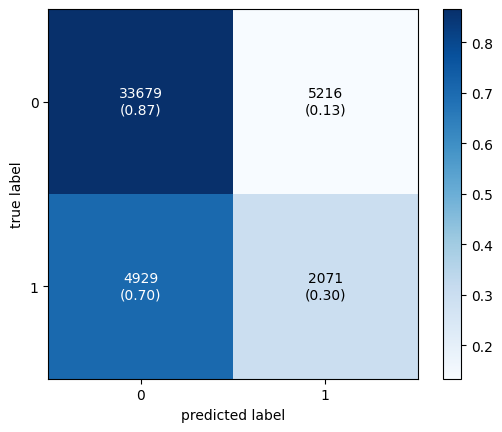

In [55]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm_dt = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm_dt,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [56]:
# K-fold Cross Validation
# define the number of folds
num_folds = 10

# define the evaluation metric
scoring = 'accuracy'

# define the k-fold cross validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=10)

# define the model
model = DecisionTreeClassifier()

# evaluate the model using cross-validation
results = cross_val_score(model_dt, X_train_resampled, y_train_resampled, cv=kfold, scoring=scoring)

# print the results
print('Results of k-fold cross-validation:')
print('Mean Accuracy: {:.2f}%'.format(results.mean() * 100.0))
print('Standard Deviation: {:.2f}'.format(results.std()))

Results of k-fold cross-validation:
Mean Accuracy: 92.48%
Standard Deviation: 0.00


The number of folds for cross-validation is defined as num_folds = 10. This means that the dataset will be split into 10 parts, and the model will be trained and evaluated 10 times, with each part being used as the validation set once.
The evaluation metric for the model is defined as scoring = 'accuracy'. This means that the accuracy of the model will be used to evaluate its performance.
The KFold class from the scikit-learn library is used to define the k-fold cross-validation object. The n_splits parameter specifies the number of folds, shuffle=True specifies that the data will be shuffled before splitting, and random_state=10 ensures reproducibility of results.
The DecisionTreeClassifier model is defined using the DecisionTreeClassifier class from the scikit-learn library.
The cross_val_score function from the scikit-learn library is used to perform k-fold cross-validation. The function takes in the DecisionTreeClassifier model object, the resampled training data (X_train_resampled and y_train_resampled), the k-fold cross-validation object (kfold), and the evaluation metric (scoring). The function returns an array of accuracy scores for each fold of cross-validation.
The mean and standard deviation of the accuracy scores are calculated using the mean and std methods of the scores array.

**Multi Layer Perceptron Model**

MLP (Multilayer Perceptron) is a suitable model for classification problems with complex relationships between the input features and the target variable. 
The model can handle non-linear relationships and can capture hidden patterns in the data.
In the given dataset, there are a total of 25 features, which can have complex relationships with the target variable. 
MLP model can capture these relationships using multiple layers of neurons in the network.
The MLP model is trying to answer the question of whether a person has diabetes or not, given the values of the input features. 
It does so by passing the input data through multiple layers of neurons with non-linear activation functions. 
The model then outputs a probability score for each class, and the class with the highest score is selected as the final prediction.


In [57]:
# Initializing the model
model_MLP = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300)

# Fitting the model on the train data
model_MLP.fit(X_train_resampled, y_train_resampled)

# Predicting values on test data
predictions = model_MLP.predict(X_test)

An MLP classifier is initialized using the MLPClassifier class from the scikit-learn library. The hidden_layer_sizes parameter specifies the number of neurons in each hidden layer, and (100,50) specifies two hidden layers with 100 and 50 neurons, respectively. The max_iter parameter sets the maximum number of iterations for the solver to converge.
The model is trained on the resampled training data using the fit method of the MLPClassifier object. The fit method is used to train the model on the given input data (X_train_resampled) and output labels (y_train_resampled).
The model is then used to make predictions on the test data using the predict method of the MLPClassifier object. The predict method takes in the test data (X_test) and returns the predicted output labels for each data point in y_test.

In [58]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
194499            0                 0
107401            0                 0
16210             0                 0
127385            1                 1
162339            0                 0
...             ...               ...
180134            0                 1
130054            0                 1
233177            0                 0
209982            1                 1
164868            0                 1

[45895 rows x 2 columns]

In [59]:
# Evaluation

# Calculating the accuracy of the model
accuracy_4 = accuracy_score(y_test, predictions)
accuracies['MLPClassifier'] = accuracy_4

# Calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# Calculating the mse 
mse = mean_squared_error(y_test, predictions)

# Calculating the rmse 
rmse = math.sqrt(mse)

print('\nAccuracy score of MLP Classifier : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of MLP Classifier : 70.55

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     38895
           1       0.31      0.74      0.43      7000

    accuracy                           0.71     45895
   macro avg       0.62      0.72      0.62     45895
weighted avg       0.84      0.71      0.74     45895


**************************************************

Mean squared error : 0.2945418890946726

**************************************************

Root mean squared error : 0.5427171354349083


Confusion Matrix for MLP Classifier


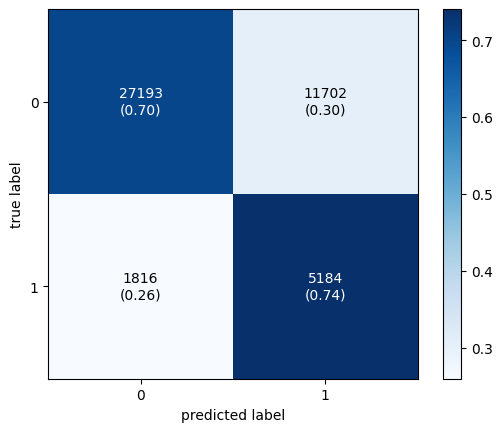

In [60]:
print('Confusion Matrix for MLP Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [68]:
# K-fold Cross Validation

# Initializing the model
model_MLP = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300)

# Performing k-fold cross-validation
scores = cross_val_score(model_MLP, X_train_resampled, y_train_resampled, cv=10)

# Calculating mean and standard deviation of the accuracy scores
mean_accuracy = scores.mean()
std_dev = scores.std()

print("Results of k-fold cross-validation for MLPClassifier model:")
print("Mean Accuracy: {:.2f}%".format(mean_accuracy*100))
print("Standard Deviation: {:.2f}".format(std_dev))

Results of k-fold cross-validation for MLPClassifier model:
Mean Accuracy: 73.54%
Standard Deviation: 0.02


The cross_val_score function from the scikit-learn library is used to perform k-fold cross-validation. The cross_val_score function takes in the MLPClassifier model object, the resampled training data (X_train_resampled and y_train_resampled), and the number of folds (cv=10 specifies 10-fold cross-validation). The function returns an array of accuracy scores for each fold of cross-validation.
The mean and standard deviation of the accuracy scores are calculated using the mean and std methods of the scores array.

The Random Forest Classifier model has the highest accuracy score (81.33%) and the lowest mean squared error (0.1867) and root mean squared error (0.4321) values.
In addition, the precision, recall, and f1-score values for the Random Forest Classifier model are also better than the other models. Therefore, based on these metrics, it can be concluded that the Random Forest Classifier model is better than the other models.